****Hackathon Blossom (Flower Classification)
This data set contains images of flowers from 102 different species.****

This project is about classification of #102 images .We will build an image classifier to recognize different piecesof flowers.

#Description of Dataset
Here we have two groups :
1. input/flower_data/train
2. input/flower_data/valid
3. input/test set/test set

**Within each train/valid floder, we have separate folder for each of the 102 flower classes.**

**My work approach::** I used pytorch.imageloader becuase it directly loads dataset from given path like
input/flower_data/train or input/flower_data/valid. Earlier i tried to load it using numpy/pandas,
then i need to write code for making train and valid set, each having images of 102 categories with proper labeling.
Like.. 1 folder will have all images inside 1 floder and label as 1, which we will replace with name(help from json cat_name).
But, using pytorch, it was easy to do so with only few lines of code.

**Algoritm Optimization:: We iincreased model accuracy by changing parameters like epoc.We changed epoc from 3 to 9.Accurancy increased from 84 to 94.**

****Then we pre-process the dataset, using pytorch, rotate,resize , normailze etc method****s.

**Algorithm used for this image classification::**
Transfer learning becuase making model from scratch would be very complex and computation expensive, would require lot of time.
Transfer learning allows us to train deep networks using significantly less data then we would need if we had to train from scratch.
In recent years, a number of models have been created for reuse in computer vision problems. Using these pre-trained models is known as transfer learning
These pre-trained models allow others to quickly obtain cutting edge results in computer vision without needing the large amounts of compute power, time, and patience in finding the right training technique to optimize the weights.
Here, i am using vggnet model, though we can use any other model.

The project is broken down into multiple steps:
1. Load and preprocess the image dataset
2. Train the image classifier on your dataset
3. Use the trained classifier to predict image content

In [1]:
#import important libraries
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable
import json
import os
import torch
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from collections import OrderedDict
from PIL import Image
from torch import Tensor
from importlib import reload
#reload(helper)
from glob import glob

In [2]:
#Make helper utility

In [3]:
def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True

In [4]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [5]:
def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

In [6]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [7]:
#Load and preprocess dataset for training and validation

In [8]:
data_dir='../input/flower_data/flower_data' 
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir='../input/test set'

In [9]:
# Define transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(size=224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

validation_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
validation_dataset = datasets.ImageFolder(valid_dir, transform=validation_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=validation_transforms)

# Using the image datasets and the transforms, define the dataloaders
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=4)
valid_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=64, num_workers=4)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=16, num_workers=4)

In [10]:
len(test_dataset)

206

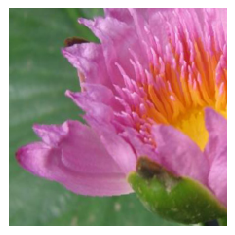

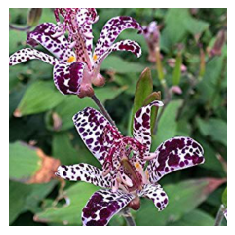

In [11]:
#Visualizing few images
image, label = next(iter(train_dataloader))
imshow(image[10])

#Visualizing few images
image, label = next(iter(test_dataloader))
imshow(image[10])

In [12]:
#Label mapping 
train_class_names = train_dataset.classes
valid_class_names=validation_dataset.classes


In [13]:
import json
with open('../input/cat_to_name.json', 'r') as f: 
    cat_to_name = json.load(f)
cat_to_name['102']

'blackberry lily'

In [14]:
category_map = sorted(cat_to_name.items(), key=lambda x: int(x[0]))

category_names = [cat[1] for cat in category_map]

In [15]:
# changing categories to their actual names 
for i in range(0,len(train_class_names)):
    train_class_names[i] = cat_to_name.get(train_class_names[i])
    
for i in range(0,len(valid_class_names)):
    valid_class_names[i] = cat_to_name.get(valid_class_names[i])

In [16]:
#Building and training the classifier
#Transfer learning::Rather than building a model and training from scratch,
#we can leverage a pretrained model, and adjust the classifier (the last part of it) as needed to fit our needs. This saves a huge amount of time and effort. We using vgg model.

In [17]:
vgg16 = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /tmp/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:12<00:00, 44346770.77it/s]


In [18]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [19]:
#Training:: We want to train the final layers of the model. 
#The following functions will run forward and backward propogation with pytorch against the training set, and then test against the validation set.

In [20]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
# Freeze parameters so we don't backprop through them
for param in vgg16.parameters():
    param.requires_grad = False

classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 4096)),
                          ('relu', nn.ReLU()),
                          ('dropout', nn.Dropout(p=0.5)),
                          ('fc2', nn.Linear(4096, 102)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
vgg16.classifier = classifier
vgg16.class_idx_mapping = train_dataset.class_to_idx

In [22]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.0001)

In [23]:
def validation(model, testloader, criterion, device):
    test_loss = 0
    accuracy = 0
    model.to(device)
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        # images.resize_(images.shape[0], 3, 224, 224)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

In [24]:
def train(model, trainloader, validloader, epochs, print_every, criterion, optimizer, device='cuda'): #cuda in kernel
    steps = 0
    
    # Change to train mode if not already
    model.train()
    # change to cuda
    model.to(device)

    for e in range(epochs):
        running_loss = 0

        for (images, labels) in trainloader:
            steps += 1

            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            # Forward and backward passes
            outputs = model.forward(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if steps % print_every == 0:
                
                # Make sure network is in eval mode for inference
                model.eval()

                # Turn off gradients for validation, saves memory and computations
                with torch.no_grad():
                    validation_loss, accuracy = validation(model, validloader, criterion, device)

                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Validation Loss: {:.3f}.. ".format(validation_loss/len(validloader)),
                      "Validation Accuracy: {:.3f}".format((accuracy/len(validloader))*100))

                model.train()
                
                running_loss = 0

In [25]:
#Testing the network::
#train(model=vgg16, 
  ##      trainloader=train_dataloader, 
    ##    validloader=valid_dataloader,
      #  epochs=3, 
     #   print_every=20, 
      #  criterion=criterion,
       # optimizer=optimizer,
       # device="cuda") # cuda in kernel


Epoch: 1/3..  Training Loss: 4.139..  Validation Loss: 3.158..  Validation Accuracy: 35.654
Epoch: 1/3..  Training Loss: 3.112..  Validation Loss: 2.168..  Validation Accuracy: 51.303
Epoch: 1/3..  Training Loss: 2.437..  Validation Loss: 1.571..  Validation Accuracy: 64.298
Epoch: 1/3..  Training Loss: 2.005..  Validation Loss: 1.186..  Validation Accuracy: 71.231
Epoch: 1/3..  Training Loss: 1.734..  Validation Loss: 0.963..  Validation Accuracy: 77.962
Epoch: 2/3..  Training Loss: 1.192..  Validation Loss: 0.815..  Validation Accuracy: 82.577
Epoch: 2/3..  Training Loss: 1.372..  Validation Loss: 0.743..  Validation Accuracy: 81.803
Epoch: 2/3..  Training Loss: 1.272..  Validation Loss: 0.702..  Validation Accuracy: 82.909
Epoch: 2/3..  Training Loss: 1.221..  Validation Loss: 0.726..  Validation Accuracy: 81.995
Epoch: 2/3..  Training Loss: 1.124..  Validation Loss: 0.566..  Validation Accuracy: 85.976
Epoch: 3/3..  Training Loss: 0.754..  Validation Loss: 0.553..  Validation Accuracy: 86.197
Epoch: 3/3..  Training Loss: 1.013..  Validation Loss: 0.531..  Validation Accuracy: 86.490
Epoch: 3/3..  Training Loss: 1.010..  Validation Loss: 0.575..  Validation Accuracy: 84.587
Epoch: 3/3..  Training Loss: 0.921..  Validation Loss: 0.489..  Validation Accuracy: 88.447
Epoch: 3/3..  Training Loss: 0.936..  Validation Loss: 0.537..  Validation Accuracy: 85.620

In [26]:
#Testing the network::
train(model=vgg16, 
        trainloader=train_dataloader, 
        validloader=valid_dataloader,
        epochs=9, 
        print_every=40, 
        criterion=criterion,
        optimizer=optimizer,
        device="cuda") # cuda in kernel

Epoch: 1/9..  Training Loss: 3.579..  Validation Loss: 2.103..  Validation Accuracy: 55.375
Epoch: 1/9..  Training Loss: 2.231..  Validation Loss: 1.221..  Validation Accuracy: 71.284
Epoch: 2/9..  Training Loss: 0.615..  Validation Loss: 0.846..  Validation Accuracy: 78.995
Epoch: 2/9..  Training Loss: 1.312..  Validation Loss: 0.674..  Validation Accuracy: 84.053
Epoch: 2/9..  Training Loss: 1.163..  Validation Loss: 0.607..  Validation Accuracy: 86.611
Epoch: 3/9..  Training Loss: 0.869..  Validation Loss: 0.564..  Validation Accuracy: 85.308
Epoch: 3/9..  Training Loss: 1.021..  Validation Loss: 0.504..  Validation Accuracy: 88.000
Epoch: 4/9..  Training Loss: 0.254..  Validation Loss: 0.492..  Validation Accuracy: 86.611
Epoch: 4/9..  Training Loss: 0.867..  Validation Loss: 0.438..  Validation Accuracy: 89.514
Epoch: 4/9..  Training Loss: 0.779..  Validation Loss: 0.409..  Validation Accuracy: 90.062
Epoch: 5/9..  Training Loss: 0.533..  Validation Loss: 0.426..  Validation Accur

Epoch: 1/9..  Training Loss: 0.830..  Validation Loss: 0.440..  Validation Accuracy: 89.856
Epoch: 1/9..  Training Loss: 0.796..  Validation Loss: 0.441..  Validation Accuracy: 88.413
Epoch: 2/9..  Training Loss: 0.308..  Validation Loss: 0.409..  Validation Accuracy: 90.096
Epoch: 2/9..  Training Loss: 0.761..  Validation Loss: 0.405..  Validation Accuracy: 90.115
Epoch: 2/9..  Training Loss: 0.736..  Validation Loss: 0.405..  Validation Accuracy: 89.736
Epoch: 3/9..  Training Loss: 0.606..  Validation Loss: 0.418..  Validation Accuracy: 90.197
Epoch: 3/9..  Training Loss: 0.724..  Validation Loss: 0.388..  Validation Accuracy: 89.856
Epoch: 4/9..  Training Loss: 0.167..  Validation Loss: 0.350..  Validation Accuracy: 91.385
Epoch: 4/9..  Training Loss: 0.659..  Validation Loss: 0.322..  Validation Accuracy: 91.264
Epoch: 4/9..  Training Loss: 0.661..  Validation Loss: 0.347..  Validation Accuracy: 91.486
Epoch: 5/9..  Training Loss: 0.426..  Validation Loss: 0.338..  Validation Accuracy: 91.024
Epoch: 5/9..  Training Loss: 0.589..  Validation Loss: 0.355..  Validation Accuracy: 90.630
Epoch: 6/9..  Training Loss: 0.073..  Validation Loss: 0.335..  Validation Accuracy: 91.111
Epoch: 6/9..  Training Loss: 0.567..  Validation Loss: 0.304..  Validation Accuracy: 92.327
Epoch: 6/9..  Training Loss: 0.604..  Validation Loss: 0.345..  Validation Accuracy: 91.212
Epoch: 7/9..  Training Loss: 0.286..  Validation Loss: 0.308..  Validation Accuracy: 93.375
Epoch: 7/9..  Training Loss: 0.565..  Validation Loss: 0.291..  Validation Accuracy: 93.014
Epoch: 7/9..  Training Loss: 0.542..  Validation Loss: 0.290..  Validation Accuracy: 92.808
Epoch: 8/9..  Training Loss: 0.533..  Validation Loss: 0.278..  Validation Accuracy: 92.841
Epoch: 8/9..  Training Loss: 0.504..  Validation Loss: 0.286..  Validation Accuracy: 93.082
Epoch: 9/9..  Training Loss: 0.205..  Validation Loss: 0.306..  Validation Accuracy: 92.567

In [27]:
#Testing on test set  can not be done as no test labels given.We can go for predicting class
def check_accuracy_on_test(testloader, model):    
    correct = 0
    total = 0
    model.to(device)
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            #print(labels)
            #print(outputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            print(total)
            #print(predicted)
            correct += (predicted == labels).sum().item()
            print(correct)
    #print(correct)

    return  correct / total

In [28]:
#Save the check point
vgg16.class_idx_mapping = train_dataset.class_to_idx
vgg16.class_idx_mapping

{'1': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '11': 5,
 '12': 6,
 '13': 7,
 '14': 8,
 '15': 9,
 '16': 10,
 '17': 11,
 '18': 12,
 '19': 13,
 '2': 14,
 '20': 15,
 '21': 16,
 '22': 17,
 '23': 18,
 '24': 19,
 '25': 20,
 '26': 21,
 '27': 22,
 '28': 23,
 '29': 24,
 '3': 25,
 '30': 26,
 '31': 27,
 '32': 28,
 '33': 29,
 '34': 30,
 '35': 31,
 '36': 32,
 '37': 33,
 '38': 34,
 '39': 35,
 '4': 36,
 '40': 37,
 '41': 38,
 '42': 39,
 '43': 40,
 '44': 41,
 '45': 42,
 '46': 43,
 '47': 44,
 '48': 45,
 '49': 46,
 '5': 47,
 '50': 48,
 '51': 49,
 '52': 50,
 '53': 51,
 '54': 52,
 '55': 53,
 '56': 54,
 '57': 55,
 '58': 56,
 '59': 57,
 '6': 58,
 '60': 59,
 '61': 60,
 '62': 61,
 '63': 62,
 '64': 63,
 '65': 64,
 '66': 65,
 '67': 66,
 '68': 67,
 '69': 68,
 '7': 69,
 '70': 70,
 '71': 71,
 '72': 72,
 '73': 73,
 '74': 74,
 '75': 75,
 '76': 76,
 '77': 77,
 '78': 78,
 '79': 79,
 '8': 80,
 '80': 81,
 '81': 82,
 '82': 83,
 '83': 84,
 '84': 85,
 '85': 86,
 '86': 87,
 '87': 88,
 '88': 89,
 '89': 90,
 '9': 91,
 '90

In [29]:
def save_checkpoint(state, filename='checkpoint.pth'):
    torch.save(state, filename)

In [30]:
save_checkpoint({
            'epoch': 9,
            'classifier': vgg16.classifier,
            'state_dict': vgg16.state_dict(),
            'optimizer' : optimizer.state_dict(),
            'class_idx_mapping': vgg16.class_idx_mapping,
            'arch': "vgg16"
            })

In [31]:
#Loading check point
def load_model(model_checkpoint):
    """
    Loads the model from a checkpoint file.

    Arguments: 
        model_checkpoint: Path to checkpoint file
    
    Returns: 
        model: Loaded model.
        idx_class_mapping: Index to class mapping for further evaluation.
    """

    checkpoint = torch.load(model_checkpoint)
    
    model = models.vgg16(pretrained=True)
    
    for param in model.parameters():
        param.requires_grad = False

    model.classifier = checkpoint["classifier"]
    model.load_state_dict(checkpoint["state_dict"])
    
    return model

In [32]:
model = load_model(model_checkpoint="checkpoint.pth")

Original image with size: (500, 753)


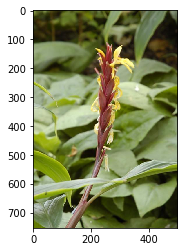

In [33]:
#Class inference

img = Image.open("../input/flower_data/flower_data/train/61/image_06281.jpg")
print("Original image with size: {}".format(img.size))
plt.imshow(img)

In [34]:
def process_image(img_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    img = Image.open(img_path)
    w, h = img.size
    if w<h:
        size = 256, 999999999
    else:
        size = 999999999, 256

    img.thumbnail(size=size)
    
    w, h = img.size
    left = (w - 224) / 2
    right = (w + 224) / 2
    top = (h - 224) / 2
    bottom = (h + 224) / 2
    
    img = img.crop((left, top, right, bottom))
    
    # Convert to numpy array
    np_img = np.array(img)/255
    
    # Normalize
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_img = (np_img - mean) / std
    
    np_img = np_img.transpose(2, 0, 1)
    
    return np_img

In [35]:
img = process_image("../input/flower_data/flower_data/train/61/image_06281.jpg")
print("After resizing, cropping and normalizing, size: {}".format(img.shape))


After resizing, cropping and normalizing, size: (3, 224, 224)


In [36]:
#Creating Dataframe to get test images names and its corresponding lablel names

For creating Dataframe with image names and their corresponding labels like 1,2..,102 etc::
1. Making prediction method to predict labels for each test images.
2. Make list to get names of all test images in test set folder
3. I will append images name and prediction in columns named 'image_name' and 'class_label' in flower_dataframe.

In [37]:
import pandas as pd

In [38]:
#Class prediction
class_idx_mapping = train_dataset.class_to_idx
idx_class_mapping = {v: k for k, v in class_idx_mapping.items()}
idx_class_mapping[1]

'10'

In [39]:
#Prediction Method
def predict(test_loader, model_checkpoint, topk=1, device="cpu", idx_class_mapping=idx_class_mapping):
    # Build the model from the checkpoint
    model = load_model(model_checkpoint)
    # No need for GPU
    model.to(device)
    
    model.eval()
    
    labels=[]
    
    with torch.no_grad():
        for images, _ in test_dataloader:
            images = images.to(device)
            output = model(images)
            ps = torch.exp(output)
            top_p, top_class = ps.topk(1, dim=1) 
            for i in top_class:
                #print(idx_class_mapping[i.item()])
                labels.append(idx_class_mapping[i.item()] )
                #print(i.item())
                      
               
    return labels

In [40]:
class_label=predict(test_dataloader,"checkpoint.pth", idx_class_mapping=idx_class_mapping)

In [41]:
print(len(class_label))

206


In [42]:
class_label[0]

'21'

In [43]:
#Methods to get list of Images names in test floder::
image_col=[]
for img_filename in os.listdir('../input/test set/test set'):
    image_col.append(img_filename)
print(len(image_col))

206


In [44]:
category_map = sorted(cat_to_name.items(), key=lambda x: int(x[0]))
plant_name=[]
for label in class_label:
    name=cat_to_name[label]
    #print(name)
    plant_name.append(name)
    #plant_name+=category_map[int(label)][1]
    #print(plant_name)
print(len(plant_name))
#print(category_map[int(class_label[3])][1] )

206


In [45]:
flower_dataframe = pd.DataFrame({'image_name': image_col, 'class_label': class_label,'plant_name': plant_name})
flower_dataframe.sort_values('image_name')

,image_name,class_label,plant_name
65,aa1.jpg,26,corn poppy
59,aa10.jpg,14,spear thistle
138,aa11.jpg,31,carnation
98,aa12.jpg,102,blackberry lily
84,aa13.jpg,46,wallflower
53,aa14.jpg,53,primula
42,aa15.jpg,22,pincushion flower
198,aa16.jpg,102,blackberry lily
90,aa17.jpg,53,primula
126,aa18.jpg,24,red ginger
